In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 데이터 경로 변수

In [2]:
DATA_PATH = "/content/drive/MyDrive/data/"
DATA_PATH

'/content/drive/MyDrive/data/'

- 시드값

In [3]:
SEED = 42

- 데이터 불러오기

In [4]:
import pandas as pd
import numpy as np

train_tr = pd.read_csv(f"{DATA_PATH}store_train_transactions.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}store_test_transactions.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터
submit_proba = pd.read_csv(f"{DATA_PATH}store_submission.csv")

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 7), (14940, 2), (441196, 7), (12225, 2))

- 공통 피처 파일 불러오기

In [5]:
train_ft = pd.read_csv(f"{DATA_PATH}train_common_1_완료.csv") # 학습 데이터(피처)
test_ft = pd.read_csv(f"{DATA_PATH}test_common_1_완료.csv") # 테스트 데이터(피처)

train_ft.shape , test_ft.shape

((14940, 1141), (12225, 1141))

# 결측치 처리

In [34]:
mask = train_ft.isnull().sum() > 0
train_ft.isnull().sum()[mask]

,0
월별_구매총액_변화량_1_12,3772
월별_구매총액_변화_비율2_1,4251
월별_구매총액_변화_비율3_2,4209
월별_구매총액_변화_비율4_3,3622
월별_구매총액_변화_비율5_4,3032
월별_구매총액_변화_비율6_5,4120
월별_구매총액_변화_비율7_6,3915
월별_구매총액_변화_비율8_7,4170
월별_구매총액_변화_비율9_8,4395
월별_구매총액_변화_비율10_9,3867


In [31]:
train_ft['일별구매횟수표준편차'].isnull().sum()

664

In [7]:
mask = test_ft.isnull().sum() > 0
test_ft.isnull().sum()[mask]

,0
일별구매횟수표준편차,443
3회이상count,3284
총_생식품_구매가격,7820
평균_생식품_구매가격,1257
구매금액표준편차,242
구매금액왜도,599
구매금액첨도,954
2004-05월_count_diff,12225
월별_구매총액_변화량_1_12,2963
월별_구매총액_변화_비율2_1,3335


In [35]:
arr = ['월별_구매총액_변화량_1_12','월별_구매총액_변화_비율2_1','월별_구매총액_변화_비율3_2','월별_구매총액_변화_비율4_3','월별_구매총액_변화_비율5_4','월별_구매총액_변화_비율6_5','월별_구매총액_변화_비율7_6','월별_구매총액_변화_비율8_7','월별_구매총액_변화_비율9_8','월별_구매총액_변화_비율10_9','월별_구매총액_변화_비율11_10','월별_구매총액_변화_비율12_11']
train_ft["구매금액표준편차"] = train_ft["구매금액표준편차"].fillna(0)
train_ft["구매금액왜도"] = train_ft["구매금액왜도"].fillna(0)
train_ft["구매금액첨도"] = train_ft["구매금액첨도"].fillna(0)
train_ft["총_생식품_구매가격"] = train_ft["총_생식품_구매가격"].fillna(0)
train_ft["평균_생식품_구매가격"] = train_ft["평균_생식품_구매가격"].fillna(0)
train_ft["3회이상count"] = train_ft["3회이상count"].fillna(0)
train_ft = train_ft.drop('2004-05월_count_diff',axis=1)
train_ft['일별구매횟수표준편차'] = train_ft['일별구매횟수표준편차'].fillna(0)
for col in arr:
    train_ft = train_ft.drop(col,axis=1)
    test_ft = test_ft.drop(col,axis=1)

test_ft["구매금액표준편차"] = test_ft["구매금액표준편차"].fillna(0)
test_ft["구매금액왜도"] = test_ft["구매금액왜도"].fillna(0)
test_ft["구매금액첨도"] = test_ft["구매금액첨도"].fillna(0)
test_ft["총_생식품_구매가격"] = test_ft["총_생식품_구매가격"].fillna(0)
test_ft["평균_생식품_구매가격"] = test_ft["평균_생식품_구매가격"].fillna(0)
test_ft["3회이상count"] = test_ft["3회이상count"].fillna(0)
test_ft = test_ft.drop('2004-05월_count_diff',axis=1)
test_ft['일별구매횟수표준편차'] = test_ft['일별구매횟수표준편차'].fillna(0)


In [36]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

# 특성 공학(Feature Engineering)

- ID 변수 제외

In [10]:
train_ft = train_ft.iloc[:,1:]
test_ft = test_ft.iloc[:,1:]
train_ft.shape, test_ft.shape

((14940, 1140), (12225, 1140))

- 추가 피처 만들어 보기

In [11]:
cols = [ col for col in train_ft.columns if col.startswith("pivot_cnt_") ]

In [12]:
train_ft["중분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["중분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["중분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["중분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["중분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["중분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 1143), (12225, 1143))

## Feature Encoding

In [13]:
cols = train_ft.select_dtypes("object").columns.tolist()
train_ft[cols].nunique()

,0
하루 구매 시간 간격,6399
주구매지점,4
주구매_중분류,246
주구매_대분류,28
주구매_수정_중분류,211
최대구매액_대분류,28
최소구매액_대분류,28


In [14]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.4 MB/s eta 0:00:00


In [15]:
import category_encoders as ce

In [16]:
enc = ce.one_hot.OneHotEncoder()
tmp = enc.fit_transform(train_ft[["주구매지점","주구매_대분류","최소구매액_대분류","최대구매액_대분류"]])
train_ft = pd.concat([train_ft,tmp],axis =1)

tmp = enc.transform(test_ft[["주구매지점","주구매_대분류","최소구매액_대분류","최대구매액_대분류"]])
test_ft = pd.concat([test_ft,tmp],axis =1)

train_ft.shape, test_ft.shape

((14940, 1231), (12225, 1231))

In [17]:
enc = ce.count.CountEncoder()
train_ft["주구매_중분류_cnt"] = enc.fit_transform(train_ft[["주구매_중분류"]])
test_ft["주구매_중분류_cnt"] = enc.transform(test_ft[["주구매_중분류"]])

train_ft.shape, test_ft.shape

((14940, 1232), (12225, 1232))

- 문자열 피처 삭제

In [18]:
cols

['하루 구매 시간 간격',
 '주구매지점',
 '주구매_중분류',
 '주구매_대분류',
 '주구매_수정_중분류',
 '최대구매액_대분류',
 '최소구매액_대분류']

In [19]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)
train_ft.shape, test_ft.shape

((14940, 1225), (12225, 1225))

In [20]:
train_ft.select_dtypes("object").columns , test_ft.select_dtypes("object").columns

(Index([], dtype='object'), Index([], dtype='object'))

In [21]:
train_ft.head()

,구매횟수,내점일수,구매주기,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,...,최대구매액_대분류_20,최대구매액_대분류_21,최대구매액_대분류_22,최대구매액_대분류_23,최대구매액_대분류_24,최대구매액_대분류_25,최대구매액_대분류_26,최대구매액_대분류_27,최대구매액_대분류_28,주구매_중분류_cnt
0,16,11,23,0.050000,0.250000,0.400000,0.300000,3,1.818182,7,...,0,0,0,0,0,0,0,0,0,241
1,41,21,16,0.357143,0.166667,0.357143,0.119048,3,2.000000,11,...,0,0,0,0,0,0,0,0,0,625
2,102,56,6,0.464912,0.140351,0.175439,0.219298,0,2.035714,12,...,0,0,0,0,0,0,0,0,0,26
3,191,92,3,0.379147,0.180095,0.236967,0.203791,3,2.293478,12,...,0,0,0,0,0,0,0,0,0,4226
4,55,27,11,0.112903,0.612903,0.209677,0.064516,4,2.296296,10,...,0,0,0,0,0,0,0,0,0,53


## Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)
train_ft.head()

,구매횟수,내점일수,구매주기,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,...,최대구매액_대분류_20,최대구매액_대분류_21,최대구매액_대분류_22,최대구매액_대분류_23,최대구매액_대분류_24,최대구매액_대분류_25,최대구매액_대분류_26,최대구매액_대분류_27,최대구매액_대분류_28,주구매_중분류_cnt
0,-0.437126,-0.369867,0.002987,-1.029777,0.001191,0.838272,0.338186,0.109631,-0.057297,0.017620,...,-0.131248,-0.07785,-0.1402,-0.200973,-0.090737,-0.071977,-0.146044,-0.067118,-0.050497,-0.726970
1,0.239394,0.144110,-0.356452,0.323951,-0.390607,0.620171,-0.552996,0.109631,0.222706,1.176010,...,-0.131248,-0.07785,-0.1402,-0.200973,-0.090737,-0.071977,-0.146044,-0.067118,-0.050497,-0.510078
2,1.890101,1.943028,-0.869935,0.798943,-0.514333,-0.304527,-0.059266,-1.643370,0.277707,1.465608,...,-0.131248,-0.07785,-0.1402,-0.200973,-0.090737,-0.071977,-0.146044,-0.067118,-0.050497,-0.848408
3,4.298510,3.793345,-1.023980,0.420933,-0.327474,0.008592,-0.135636,0.109631,0.674668,1.465608,...,-0.131248,-0.07785,-0.1402,-0.200973,-0.090737,-0.071977,-0.146044,-0.067118,-0.050497,1.523851
4,0.618244,0.452496,-0.613193,-0.752532,1.707410,-0.130285,-0.821561,0.693965,0.679008,0.886413,...,-0.131248,-0.07785,-0.1402,-0.200973,-0.090737,-0.071977,-0.146044,-0.067118,-0.050497,-0.833157


# 정답 데이터

In [38]:
target = train_target["target"]
target

,target
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
14935,0.0
14936,0.0
14937,0.0
14938,1.0


# cv 점수 확인해보기

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=5,shuffle=True, random_state=SEED)

# 피처셀렉션

In [40]:
# from sklearn.ensemble import RandomForestClassifier
# from lightgbm import LGBMClassifier
# from sklearn.linear_model import LogisticRegression
# rf = LGBMClassifier(random_state=42) # 특성 선택을 하기 위한 모델
# model = LogisticRegression(random_state=42)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [53]:
# from sklearn.feature_selection import SelectKBest, SelectPercentile
# model = LGBMClassifier(random_state=42)
# sp = SelectPercentile(percentile=30) # 상위 10% 피처 선택
# x = sp.fit_transform(train_ft, target)
# scores = cross_val_score(model, x, target, cv=cv, scoring="f1_macro", n_jobs=-1)
# scores.mean()

0.7076864617208652

In [86]:
from tqdm.notebook import tqdm
model = LGBMClassifier(random_state=42)

scores = []
for percentile in tqdm(range(60,100)):
    sp = SelectPercentile(percentile=percentile)
    x = sp.fit_transform(train_ft, target)
    score = cross_val_score(model, x, target, cv=cv, scoring="f1_macro", n_jobs=-1).mean()
    scores.append([percentile, score])
scores = np.array(scores)
idx = np.argmax(scores[:,1])
best_score = scores[idx]

  0%|          | 0/40 [00:00<?, ?it/s]

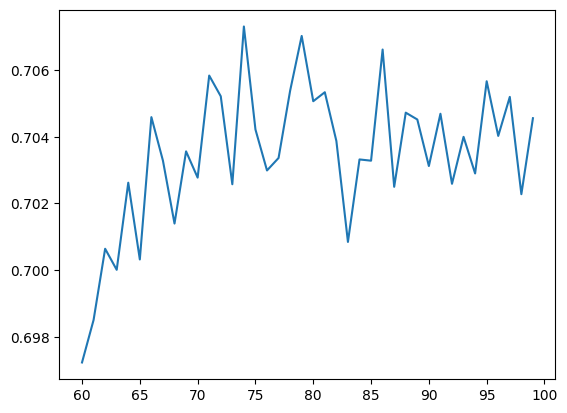

In [87]:
import matplotlib.pyplot as plt
plt.plot(scores[:,0], scores[:,1])
plt.show()

In [88]:
sp = SelectPercentile(percentile=best_score[0])
sp.fit(train_ft,target)
best_cols = sp.get_feature_names_out()
best_cols

array(['18시이후구매비율', '평일_18시_구매비율', '주구매시간', '12시이전구매비율',
       '12시이후_18시이전구매비율', '목요일방문비율', '12시이전구매횟수', '총구매액', '대분류_생식품_cnt',
       'pivot_cnt_용기보증', '최대구매액', '구매금액표준편차', '최대구매액 - 최소구매액',
       '거래개월대비구매비용', '수정_중_pivot_cnt_용기보증', '일별평균구매횟수', '중분류_아동_cnt',
       '평균구매액', '평균_생식품_구매가격', '구매금액_3q', '브랜드코드_평균구매액', '총_생식품_구매가격',
       '수정_중분류_nunique', '방문평균거래평균횟수', '12시이후_18시이전구매횟수', '구매금액왜도',
       '여름_구매비율', '거래기간일수', '구매금액첨도', '일별구매횟수표준편차', '실제구매횟수', '일별평균구매건수',
       '중분류별_구매횟수_kurt', '중분류별_구매횟수_std', '구매주기', '주구매_중분류_cnt',
       '가족단위_구매비율', 'pivot_cnt_야채', '월별_구매총액_7', '구매수요일cnt', '화요일방문비율',
       '금요일방문비율', '중_주구매비율', '수요일방문비율', '중분류별_구매횟수_skew', '대_주구매비율',
       '구매횟수', '거래개월대비구매횟수', '구매월요일cnt', '주중방문비율', '월요일방문비율', '반복중분류비율',
       '구매목요일cnt', '주말방문비율', '봄_구매비율', '골프유무', '내점일수', '2004-07월_sum',
       '중분류_nunique', '대분류_nunique', '골프count', '겨울_구매비율', '일요일방문비율',
       '대분류_아동_cnt', 'pivot_금액합_지점A373000', '대_pivot_cnt영플라자',
       '대_pivot_cnt생식품', '대_pivot_cnt패션잡화

In [ ]:
# from sklearn.feature_selection import SelectFromModel
# train_ft.columns = train_ft.columns.str.replace("  ", "__", regex=False)
# fs = SelectFromModel(rf) # 특성 선택에 사용하기 위한 모델 객체를 전달해줘야함.
# x_train = fs.fit_transform(train_ft, target) # 특성 선택이 완료된 입력 데이터가 ndarray 로 반환
# scores = cross_val_score(model, x_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
# scores.mean()

In [ ]:
best_cols = sp.get_feature_names_out()
best_cols

In [89]:
train_ft = train_ft[best_cols]
test_ft = test_ft[best_cols]
train_ft.shape, test_ft.shape
# # train_ft = pd.concat([train_ft[best_cols],train_ft["3회이상count"]],axis=1)
# # test_ft = pd.concat([test_ft[best_cols],test_ft["3회이상count"]],axis=1)
# # train_ft.shape, test_ft.shape

((14940, 92), (12225, 92))

In [ ]:
train_ft

In [104]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 예시 데이터셋 불러오기
# X: 피처 데이터셋, y: 타겟 변수
# X, y = 데이터셋 로드

# 데이터셋 분리 (train/test split)
X_train, X_test, y_train, y_test = train_test_split(train_ft, target, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 초기화
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 피처 중요도 계산
feature_importances = model.feature_importances_

# 피처 중요도를 데이터프레임으로 변환하여 정렬
feature_importance_df = pd.DataFrame({
    'Feature': train_ft.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 중요도 상위 10개 피처 출력
print(feature_importance_df.head(70))

            Feature  Importance
0         18시이후구매비율    0.040346
1       평일_18시_구매비율    0.034809
5           목요일방문비율    0.018200
2             주구매시간    0.017003
10            최대구매액    0.016418
..              ...         ...
69     2004-07월_max    0.008167
91     2005-01월_max    0.008156
77     2004-07월_avg    0.008144
65  대_pivot_cnt영플라자    0.008103
76        월별_구매총액_4    0.008101

[70 rows x 2 columns]


In [105]:
print(feature_importance_df)

              Feature  Importance
0           18시이후구매비율    0.040346
1         평일_18시_구매비율    0.034809
5             목요일방문비율    0.018200
2               주구매시간    0.017003
10              최대구매액    0.016418
..                ...         ...
37       pivot_cnt_야채    0.006273
87     2004-06월_count    0.006101
66     대_pivot_cnt생식품    0.005119
55               골프유무    0.004490
78  수정_중_pivot_cnt_아동    0.003806

[92 rows x 2 columns]


In [81]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 임계값 후보 리스트
thresholds = np.arange(0.001, 0.02, 0.001)  # 0.001 ~ 0.02 사이의 값들을 시도
best_score = 0
best_threshold = 0
best_features = None

for threshold in thresholds:
    # 현재 임계값 기준으로 피처 선택
    selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()
    X_train_selected = X_train[selected_features]

    # 모델 학습 및 교차 검증으로 성능 평가
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)

    # 최적의 성능을 찾으면 갱신
    if mean_score > best_score:
        best_score = mean_score
        best_threshold = threshold
        best_features = selected_features

print("최적의 임계값:", best_threshold)
print("최적의 성능:", best_score)
print("선택된 피처 수:", len(best_features))
print("선택된 피처 목록:", best_features)

최적의 임계값: 0.002
최적의 성능: 0.7182057541442894
선택된 피처 수: 124
선택된 피처 목록: ['18시이후구매비율', '평일_18시_구매비율', '주구매시간', '12시이전구매비율', '12시이후_18시이전구매비율', '18시이후구매횟수', '목요일방문비율', '12시이전구매횟수', '총구매액', '대분류_생식품_cnt', 'pivot_cnt_용기보증', '최대구매액', '구매금액표준편차', '최대구매액 - 최소구매액', '구매금액_1q', '거래개월대비구매비용', '수정_중_pivot_cnt_용기보증', '구매금액_2q', '일별평균구매횟수', '중분류_아동_cnt', '평균구매액', '평균_생식품_구매가격', '구매금액_3q', '브랜드코드_평균구매액', '총_생식품_구매가격', '수정_중분류_nunique', '방문평균거래평균횟수', '최소구매액', '12시이후_18시이전구매횟수', '구매금액왜도', '여름_구매비율', '거래기간일수', '구매금액첨도', '일별구매횟수표준편차', '실제구매횟수', '일별평균구매건수', '최근구매_구매주기', '중분류별_구매횟수_kurt', '중분류별_구매횟수_std', '구매주기', '주구매_중분류_cnt', 'pivot_금액합_지점A112000', '가족단위_구매비율', '금토일방문비율', 'pivot_cnt_야채', '월별_구매총액_7', '구매수요일cnt', '화요일방문비율', '금요일방문비율', '중_주구매비율', '수요일방문비율', '중분류별_구매횟수_skew', '대_주구매비율', '월별_구매총액_변화량_4_3', '구매횟수', '월별_구매총액_변화량_5_4', '거래개월대비구매횟수', '구매월요일cnt', '주중방문비율', '월별_구매총액_변화량_8_7', '금오후토일방문비율', '월요일방문비율', '반복중분류비율', '구매목요일cnt', '주말방문비율', 'pivot_방문횟수_A112000', '봄_구매비율', '월별_구매총액_변화량_6_5', '월별_구매총액_변화량_7_6', '

In [82]:
train_ft=train_ft[best_features]
test_ft=test_ft[best_features]

In [75]:
# from sklearn.feature_selection import SelectFromModel
# from lightgbm import LGBMClassifier

# lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
#             reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

# embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
# embeded_lgb_selector.fit(train_ft, target)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.470214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 106609
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 1180
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1),
                threshold='1.25*median')

In [77]:
# embeded_lgb_support = embeded_lgb_selector.get_support()
# embeded_lgb_feature = train_ft.loc[:,embeded_lgb_support].columns.tolist()
# print(str(len(embeded_lgb_feature)), 'selected features')

600 selected features


In [90]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=SEED)
scores = cross_val_score(model,train_ft,target,cv  = cv ,scoring='f1_macro',n_jobs = -1)
np.mean(scores)

0.6827780072842259

In [91]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=SEED)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='f1_macro',n_jobs = -1)
np.mean(scores)

0.6922932792673258

In [92]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='f1_macro',n_jobs = -1)
np.mean(scores)

0.7073048791879476

In [ ]:
# %pip install dask[dataframe]

In [93]:
%pip install flaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.9/313.9 kB 8.4 MB/s eta 0:00:00


In [96]:
from flaml import AutoML
auto_ml = AutoML()
params = {
    "metric": "macro_f1",
    "task" : "classification",
    "time_budget": 60*3,
    "seed" : 42,
    "early_stop": True
}

auto_ml.fit(train_ft, target, **params)

[flaml.automl.logger: 11-06 08:09:29] {1728} INFO - task = classification
[flaml.automl.logger: 11-06 08:09:29] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 11-06 08:09:30] {1838} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl.logger: 11-06 08:09:30] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 11-06 08:09:30] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 11-06 08:09:31] {2393} INFO - Estimated sufficient time budget=10143s. Estimated necessary time budget=235s.
[flaml.automl.logger: 11-06 08:09:31] {2442} INFO -  at 2.5s,	estimator lgbm's best error=0.6223,	best estimator lgbm's best error=0.6223
[flaml.automl.logger: 11-06 08:09:31] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 11-06 08:09:32] {2442} INFO -  at 3.8s,	estimator lgbm's best error=0.6223,	best estimator lgbm's best error=0.6223
[flaml.automl.logger

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 11-06 08:09:35] {2442} INFO -  at 6.7s,	estimator sgd's best error=0.3980,	best estimator sgd's best error=0.3980
[flaml.automl.logger: 11-06 08:09:35] {2258} INFO - iteration 3, current learner xgboost
[flaml.automl.logger: 11-06 08:09:36] {2442} INFO -  at 7.9s,	estimator xgboost's best error=0.6223,	best estimator sgd's best error=0.3980
[flaml.automl.logger: 11-06 08:09:36] {2258} INFO - iteration 4, current learner xgboost
[flaml.automl.logger: 11-06 08:09:37] {2442} INFO -  at 8.7s,	estimator xgboost's best error=0.6223,	best estimator sgd's best error=0.3980
[flaml.automl.logger: 11-06 08:09:37] {2258} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 11-06 08:09:38] {2442} INFO -  at 9.6s,	estimator lgbm's best error=0.3623,	best estimator lgbm's best error=0.3623
[flaml.automl.logger: 11-06 08:09:38] {2258} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 11-06 08:09:38] {2442} INFO -  at 10.2s,	estimator lgbm's best error=0.330

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 11-06 08:12:32] {2442} INFO -  at 183.4s,	estimator lrl1's best error=0.3046,	best estimator lgbm's best error=0.2911
[flaml.automl.logger: 11-06 08:12:34] {2685} INFO - retrain lgbm for 2.4s
[flaml.automl.logger: 11-06 08:12:34] {2688} INFO - retrained model: LGBMClassifier(learning_rate=0.39910484041815447, max_bin=63,
               min_child_samples=10, n_estimators=131, n_jobs=-1, num_leaves=4,
               reg_alpha=0.0018945146296456693, reg_lambda=0.10892016707222783,
               verbose=-1)
[flaml.automl.logger: 11-06 08:12:34] {1985} INFO - fit succeeded
[flaml.automl.logger: 11-06 08:12:34] {1986} INFO - Time taken to find the best model: 57.11240792274475


In [97]:
auto_ml.model.estimator

LGBMClassifier(learning_rate=0.39910484041815447, max_bin=63,
               min_child_samples=10, n_estimators=131, n_jobs=-1, num_leaves=4,
               reg_alpha=0.0018945146296456693, reg_lambda=0.10892016707222783,
               verbose=-1)

In [107]:
1-auto_ml_ens.best_loss

0.7159245821084782

In [106]:
#앙상블 해보기
auto_ml_ens = AutoML()
params = {
    "metric": "macro_f1",
    "task" : "classification",
    "time_budget": 60*3,
    "seed" : SEED,
    "early_stop": True, # 메타모델이 로지스틱회귀!!
    "ensemble": True
}
auto_ml_ens.fit(train_ft, target, **params)

[flaml.automl.logger: 11-06 08:37:52] {1728} INFO - task = classification
[flaml.automl.logger: 11-06 08:37:52] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 11-06 08:37:52] {1838} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl.logger: 11-06 08:37:52] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 11-06 08:37:52] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 11-06 08:37:52] {2393} INFO - Estimated sufficient time budget=6432s. Estimated necessary time budget=149s.
[flaml.automl.logger: 11-06 08:37:52] {2442} INFO -  at 1.3s,	estimator lgbm's best error=0.6223,	best estimator lgbm's best error=0.6223
[flaml.automl.logger: 11-06 08:37:52] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 11-06 08:37:53] {2442} INFO -  at 1.8s,	estimator lgbm's best error=0.6223,	best estimator lgbm's best error=0.6223
[flaml.automl.logger:

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 11-06 08:37:56] {2442} INFO -  at 5.1s,	estimator sgd's best error=0.3980,	best estimator lgbm's best error=0.3623
[flaml.automl.logger: 11-06 08:37:56] {2258} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 11-06 08:37:59] {2442} INFO -  at 7.8s,	estimator lgbm's best error=0.3309,	best estimator lgbm's best error=0.3309
[flaml.automl.logger: 11-06 08:37:59] {2258} INFO - iteration 5, current learner xgboost
[flaml.automl.logger: 11-06 08:38:00] {2442} INFO -  at 8.6s,	estimator xgboost's best error=0.6223,	best estimator lgbm's best error=0.3309
[flaml.automl.logger: 11-06 08:38:00] {2258} INFO - iteration 6, current learner xgboost
[flaml.automl.logger: 11-06 08:38:00] {2442} INFO -  at 9.3s,	estimator xgboost's best error=0.6223,	best estimator lgbm's best error=0.3309
[flaml.automl.logger: 11-06 08:38:00] {2258} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 11-06 08:38:01] {2442} INFO -  at 9.8s,	estimator lgbm's best error=0.3

In [108]:
pred = auto_ml_ens.predict(test_ft)
pred

array([0., 0., 0., ..., 0., 0., 0.])

# 모델 학습

In [ ]:
model = LGBMClassifier(random_state=SEED)
model.fit(train_ft,target)

# 테스트 데이터 예측

In [ ]:
pred = model.predict(test_ft)
pred

In [ ]:
# pred = model.predict_proba(test_ft)[:,1]
# pred

# 평가를 위한 제출 파일 생성
- 예측 결과를 target 컬럼에 넣어 csv 파일로 저장후에 제출한다.

In [ ]:
submit

In [109]:
submit["target"] = pred
submit

,ID,target
0,test_0,0.0
1,test_1,0.0
2,test_2,0.0
3,test_3,1.0
4,test_4,1.0
...,...,...
12220,test_12220,1.0
12221,test_12221,0.0
12222,test_12222,0.0
12223,test_12223,0.0


- 예측 결과를 csv 파일로 저장하여 제출

In [110]:
submit.to_csv(f"{DATA_PATH}submit.csv",index=False)

In [111]:
pred_proba = auto_ml_ens.predict_proba(test_ft)[:,1]
pred_proba

array([0.12092563, 0.27749376, 0.28823822, ..., 0.0455122 , 0.15823258,
       0.02600806])

In [115]:
submit_proba["target"]=pred_proba
submit_proba

,ID,target
0,test_0,0.120926
1,test_1,0.277494
2,test_2,0.288238
3,test_3,0.862901
4,test_4,0.598599
...,...,...
12220,test_12220,0.804708
12221,test_12221,0.294589
12222,test_12222,0.045512
12223,test_12223,0.158233


In [116]:
submit_proba.to_csv(f"{DATA_PATH}submit_proba.csv",index=False)